# Naive Bayes (강재영)

### 확률 기반 분류기
### 데이터가 각 클래스에 속할 특징 확률을 계산
### Naive: 예측한 특징이 상호 독립적이라는 가정 하에 확률 계산을 단순화함
### Bayes: 입력 특징이 클래스 전체의 확률 분포 대비 특정 클래스에 속할 확률을 베이즈 정리를 기반으로 계산
### 베이즈 정리: P(A｜B)는 사건 B가 주어졌을 때 사건 A가 일어날 확률
#### 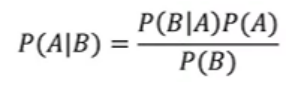
### 나이브 베이즈의 목표는 n개의 특징을 가진 샘플 데이터 x가 주어졌을 때 k개의 클래스 중 하나에 속할 확률을 결정하는 것!
### 샘플 데이터 x_1, x_2, x_3, …, x_n의 값을 가진 특징으로 구성되고 y_k는 샘플 데이터가 k에 속하는 사건을 나타냄
### --> 베이즈 정리를 적용
#### 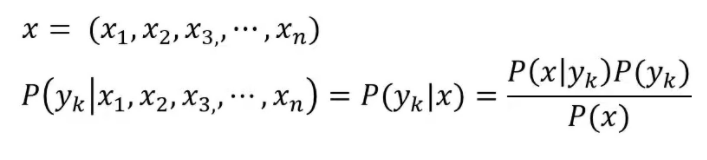
### 샘플 데이터 k에 속하는 사건의 확률 P(y_k)는 관측값의 특징에 대한 지식없이 클래스가 어떻게 분포되어 있는지 나타냄
### --> "사전 확률"
#### 사전 확률은 사전에 결정되어 있거나, 학습 샘플 데이터를 이용해 학습시킬 수도 있음
### P(y_k｜x)는 관측값에 대해 외부 지식을 이용한 "사후 확률"
### P(y_k｜x)는 클래스 y_k에 속한 샘플 데이터가 주어졌을 때 n개의 특징에 대한 결합 분포를 나타냄 --> "유사가능도"
### 나이브 베이즈는 특징 간 서로 독립이라는 가정이 있으므로, n개의 특징에 대한 결합 조건부 분포는 특징들의 분포를 곱한 것으로 표현 가능
#### 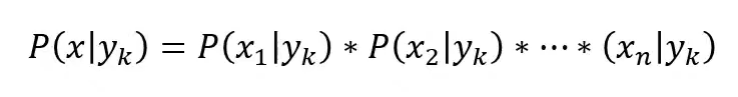
### P(x)는 특정 클래스에 속하지 않은 특징의 분포에 따라 값이 계산되므로 상수로 처리할 수 있음
### 사전 확률과 유사가능도를 이용해 사후 확률을 계산할 수 있음
#### 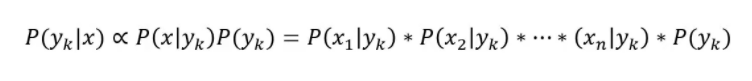
### 라플라스 스무딩(Laplace smoothing): 특징의 출현 횟수 초기값을 1부터 시작해 0을 곱하여 발생하는 문제를 해결함(발견되지 않은 특징의 출현 빈도 초기값을 1로 설정함)

### -- Mushroom Classification --
#### https://www.kaggle.com/uciml/mushroom-classification 데이터 사용

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import os

In [2]:
mush = pd.read_csv('mushrooms.csv')
mush.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [3]:
mush.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [4]:
mush.shape

(8124, 23)

In [5]:
mush.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,...,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,...,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,...,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,...,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


In [6]:
#시각화
import pandas_profiling
report = pandas_profiling.ProfileReport(mush)
display(report)

Summarize dataset:   0%|          | 0/36 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

### Label Encoding

In [8]:
#라벨 인코딩
le = LabelEncoder()
mush_encoded=mush.apply(func=le.fit_transform)
mush_encoded.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1


In [9]:
#veil-type 칼럼 제거
mush1 = mush_encoded.drop(['veil-type'],axis=1)

<AxesSubplot:title={'center':'Target Rate'}, ylabel='class'>

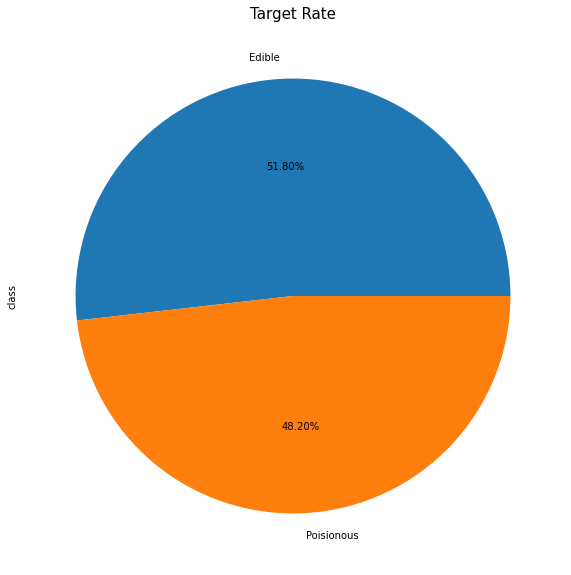

In [10]:
#타겟에 대한 비율을 파이 차트로 표현
plt.figure(figsize=(10,10))
plt.title('Target Rate', fontsize=15)
mush1['class'].value_counts().plot.pie(autopct='%1.2f%%',
                                            labels=['Edible', 'Poisionous'])

In [11]:
X=mush1.drop(mush_encoded[['class']],axis=1)
y=mush1[['class']]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [13]:
X_train.shape

(5686, 21)

In [14]:
y_train.shape

(5686, 1)

In [15]:
X_test.shape

(2438, 21)

In [16]:
y_test.shape

(2438, 1)

In [17]:
X_Train=np.array(X_train)
X_Test=np.array(X_test)
y_Train=np.array(y_train).reshape(-1,)
y_Test=np.array(y_test).reshape(-1,)

### 사전 확률

In [18]:
def prior_probability(y_t,labels):
    for i in range(y_t.shape[0]):
        numerator= (y_t== labels).sum()
    denominator= y_t.shape[0]
    return numerator/denominator

In [19]:
prior_probability(y_Train,0)

0.5189940204009849

### Bernoulli Naive Bayes
#### : 베르누이 분포를 따르는 나이브 베이즈 모델
#### 이진 데이터, 텍스트 데이터에 주로 사용

### Multinomial Naive Bayes
#### : 다항 분포를 따르는 나이브 베이즈 모델
#### 빈도 데이터, 텍스트 데이터에 주로 사용

### Gaussian Naive Bayes
#### : 정규 분포를 따르는 나이브 베이즈 모델
#### 연속형, 고차원 데이터에 주로 사용

### Multinomial Naive Bayes 적용

In [20]:
from sklearn.naive_bayes import MultinomialNB
clf_mul = MultinomialNB()
clf_mul.fit(X_train, y_train)
clf_mul.score(X_train, y_train)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.8081252198381991

In [21]:
y_pred = clf_mul.fit(X_train, y_train).predict(X_test)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [22]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[1176,   81],
       [ 400,  781]], dtype=int64)

In [23]:
#정확도, 정밀도, 재현율, f1_score, roc_auc 측정
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
#정확도: 실측값, 예측값 순으로 작성
print('accuracy:{:0.4f}'.format(accuracy_score(y_test, y_pred)))
print('precision:{:0.4f}'.format(precision_score(y_test, y_pred)))
print('recall:{:0.4f}'.format(recall_score(y_test, y_pred)))
print('f1:{:0.4f}'.format(f1_score(y_test, y_pred)))
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_test, y_pred)))

accuracy:0.8027
precision:0.9060
recall:0.6613
f1:0.7646
roc_auc:0.7984


### One-Hot Encoding

In [24]:
X_features_ohe = pd.get_dummies(mush1, columns=['cap-shape','cap-surface','cap-color','bruises','odor','gill-attachment',
                                                    'gill-spacing','gill-size','gill-color','stalk-shape','stalk-root',
                                                    'stalk-surface-above-ring','stalk-surface-below-ring','stalk-color-above-ring',
                                                    'stalk-color-below-ring','veil-color','ring-number','ring-type',
                                                    'spore-print-color','population','habitat'])

In [25]:
#One-Hot Encoding이 적용된 피처 데이터 세트 기반으로 학습/예측 데이터 분할
X_train, X_test, y_train, y_test = train_test_split(X_features_ohe, y,
                                                   test_size=0.3, random_state=0)

### Bernoulli Naive Bayes 적용

In [26]:
from sklearn.naive_bayes import BernoulliNB
clf_Ber = BernoulliNB()
clf_Ber.fit(X_train, y_train)
clf_Ber.score(X_train, y_train)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9899753781217024

In [27]:
ohe_pred = clf_Ber.fit(X_train, y_train).predict(X_test)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [28]:
confusion_matrix(y_test, ohe_pred)

array([[1272,    0],
       [  23, 1143]], dtype=int64)

In [29]:
#정확도, 정밀도, 재현율, f1_score, roc_auc 측정

print('accuracy:{:0.4f}'.format(accuracy_score(y_test, ohe_pred)))
print('precision:{:0.4f}'.format(precision_score(y_test, ohe_pred)))
print('recall:{:0.4f}'.format(recall_score(y_test, ohe_pred)))
print('f1:{:0.4f}'.format(f1_score(y_test, ohe_pred)))
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_test, ohe_pred)))

accuracy:0.9906
precision:1.0000
recall:0.9803
f1:0.9900
roc_auc:0.9901


#### 성능 개선 확인됨

### Multinomial Naive Bayes 적용

In [30]:
ohe_mul = MultinomialNB()
ohe_mul.fit(X_train, y_train)
ohe_mul.score(X_train, y_train)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


0.9954273654590221

In [31]:
ohem_pred = ohe_mul.fit(X_train, y_train).predict(X_test)

C:\Users\tom11\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [32]:
confusion_matrix(y_test, ohem_pred)

array([[1272,    0],
       [  10, 1156]], dtype=int64)

In [33]:
#정확도, 정밀도, 재현율, f1_score, roc_auc 측정

print('accuracy:{:0.4f}'.format(accuracy_score(y_test, ohem_pred)))
print('precision:{:0.4f}'.format(precision_score(y_test, ohem_pred)))
print('recall:{:0.4f}'.format(recall_score(y_test, ohem_pred)))
print('f1:{:0.4f}'.format(f1_score(y_test, ohem_pred)))
print('roc_auc:{:0.4f}'.format(roc_auc_score(y_test, ohem_pred)))

accuracy:0.9959
precision:1.0000
recall:0.9914
f1:0.9957
roc_auc:0.9957
